# Comparing Diffrent ML Methods and Findings

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
CM_CNN = pd.read_csv('/content/CM_CNN.csv', header=0)
CM_DLANN = pd.read_csv('/content/CM_DLANN.csv', header=0)
CM_RF = pd.read_csv('/content/CM_RF.csv', header=0)
CM_SVM = pd.read_csv('/content/CM_SVM.csv', header=0)
CM_LR = pd.read_csv('/content/CM_LR.csv', header=0)

In [25]:
dfs = {'CNN Model': CM_CNN, 'Double Layer ANN Model': CM_DLANN, 'Random Forest Model': CM_RF, 'SVM Model':CM_SVM, 'Linear Regression Model': CM_LR}
classes = {
  0:	'T-shirt/top',
  1:	'Trouser',
  2:	'Pullover',
  3:	'Dress',
  4:	'Coat',
  5:	'Sandal',
  6:	'Shirt',
  7:	'Sneaker',
  8:	'Bag',
  9:	'Ankle boot',
  }

In [26]:
def plot_criteria(data, classes):
  for i, df in data.items():
    confusion_mtrx = df.drop(columns=df.columns[0])
    fig = plt.figure(figsize=(20,7))
    plt.subplot(1,2,1)
    sns.heatmap(confusion_mtrx,xticklabels=[value for value in classes.values()], yticklabels=[value for value in classes.values()],annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title('Confusion Matrix for {}'.format(i))
    plt.subplot(1,2,2)
    sns.barplot(x=[value for value in classes.values()], y=np.diag(confusion_mtrx))
    plt.title('True Positives for {}'.format(i))
    plt.ylabel('count of true positives for {}'.format(i))
    plt.xlabel('classes')
    plt.show()

# Comparing Diffrent Confusion Matricies and True Positives



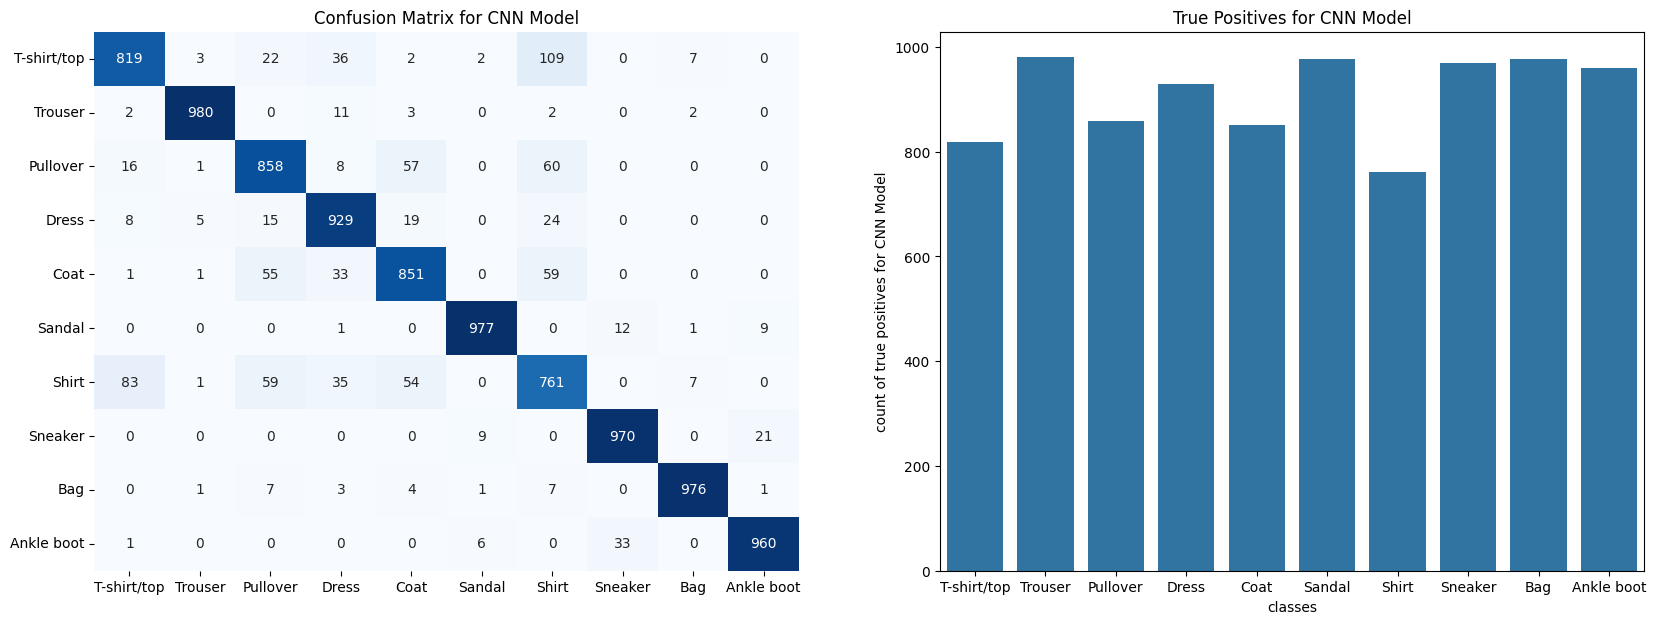

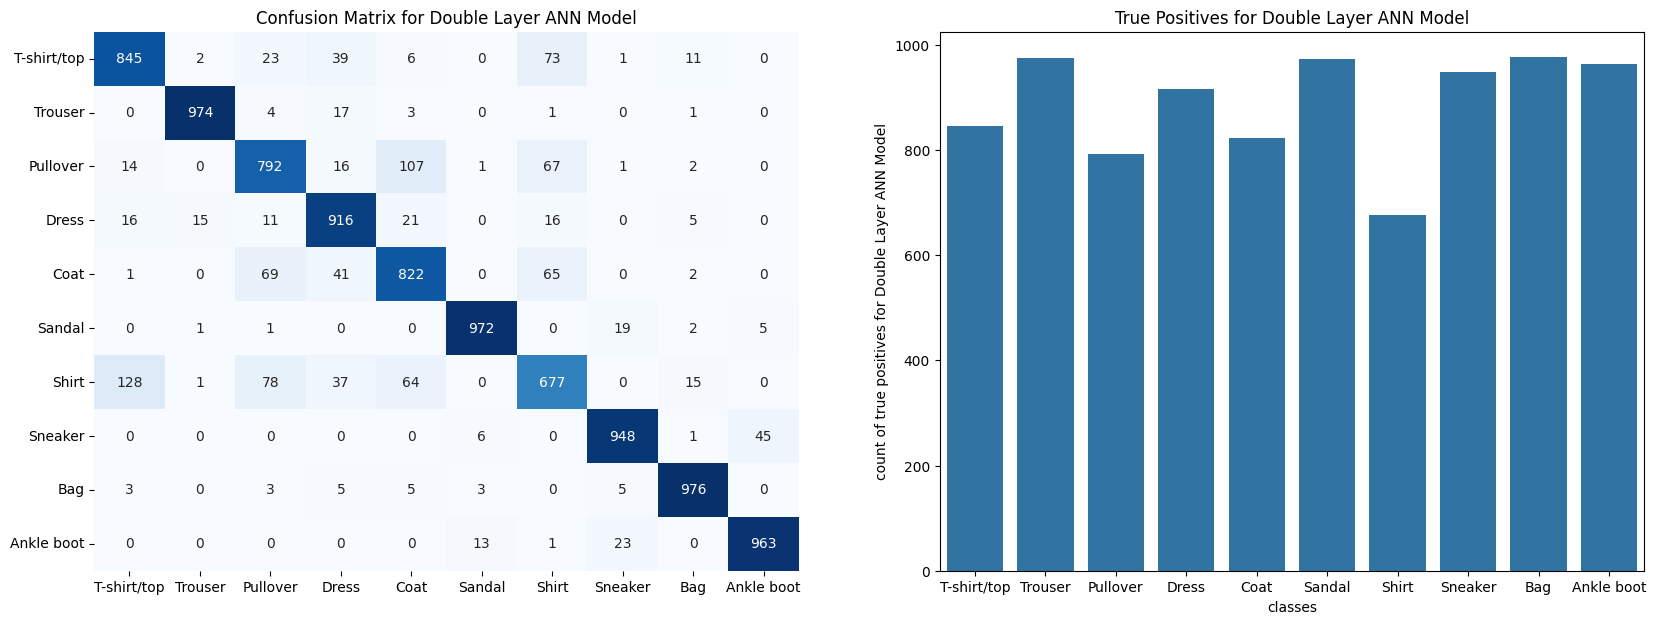

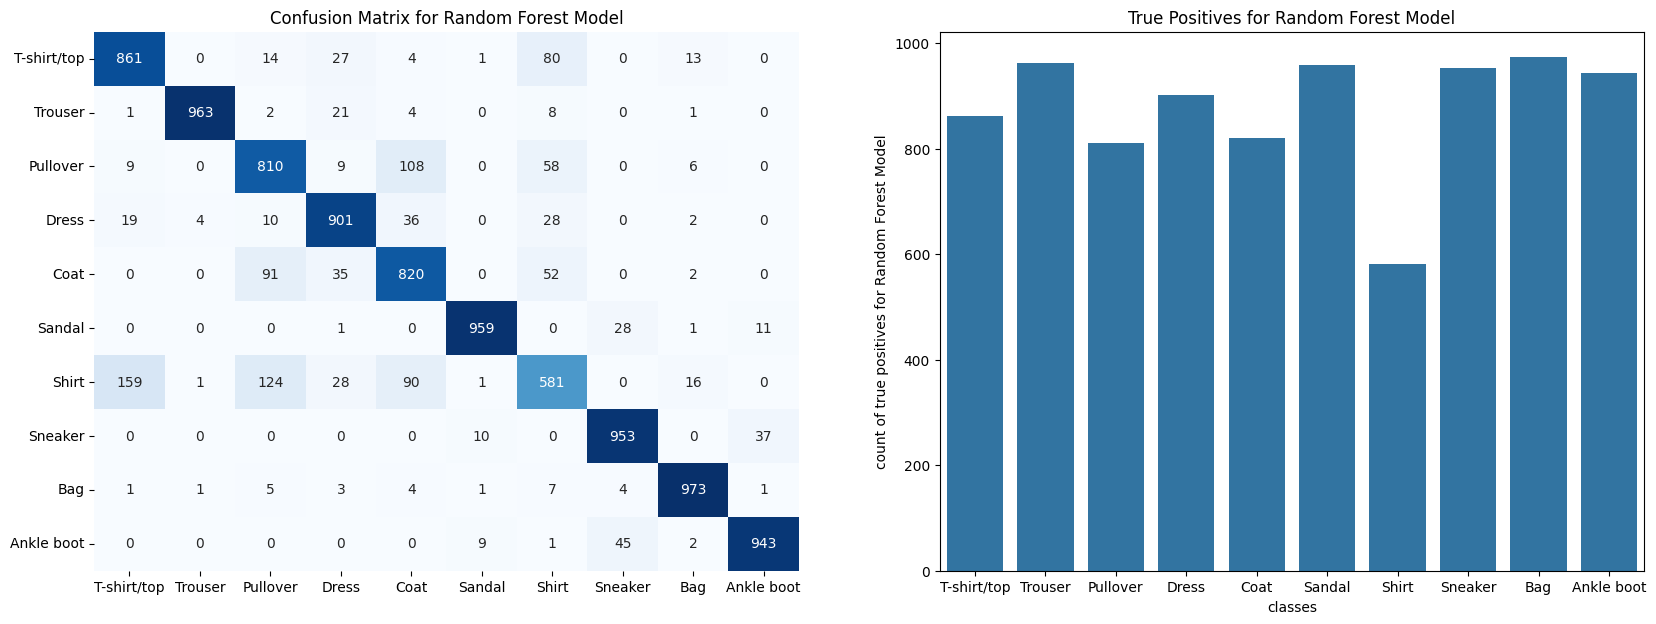

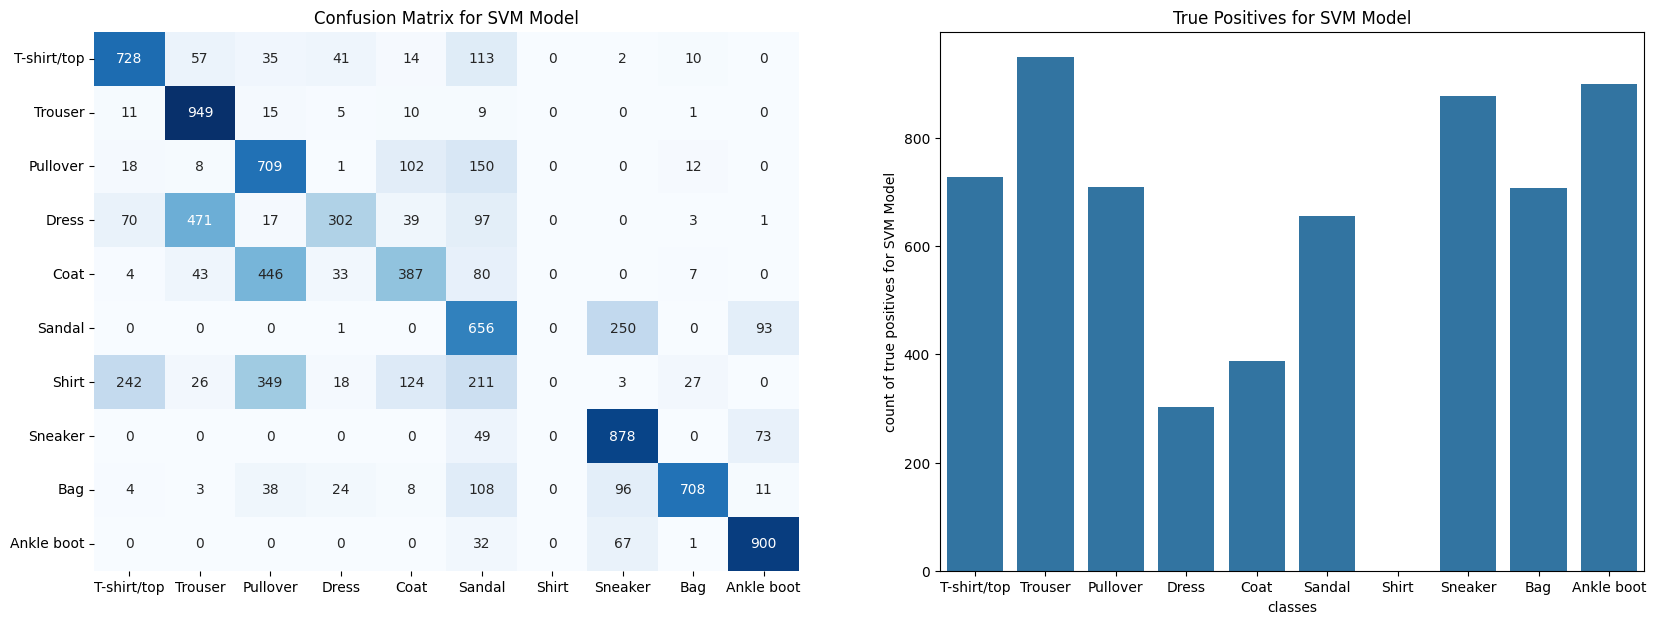

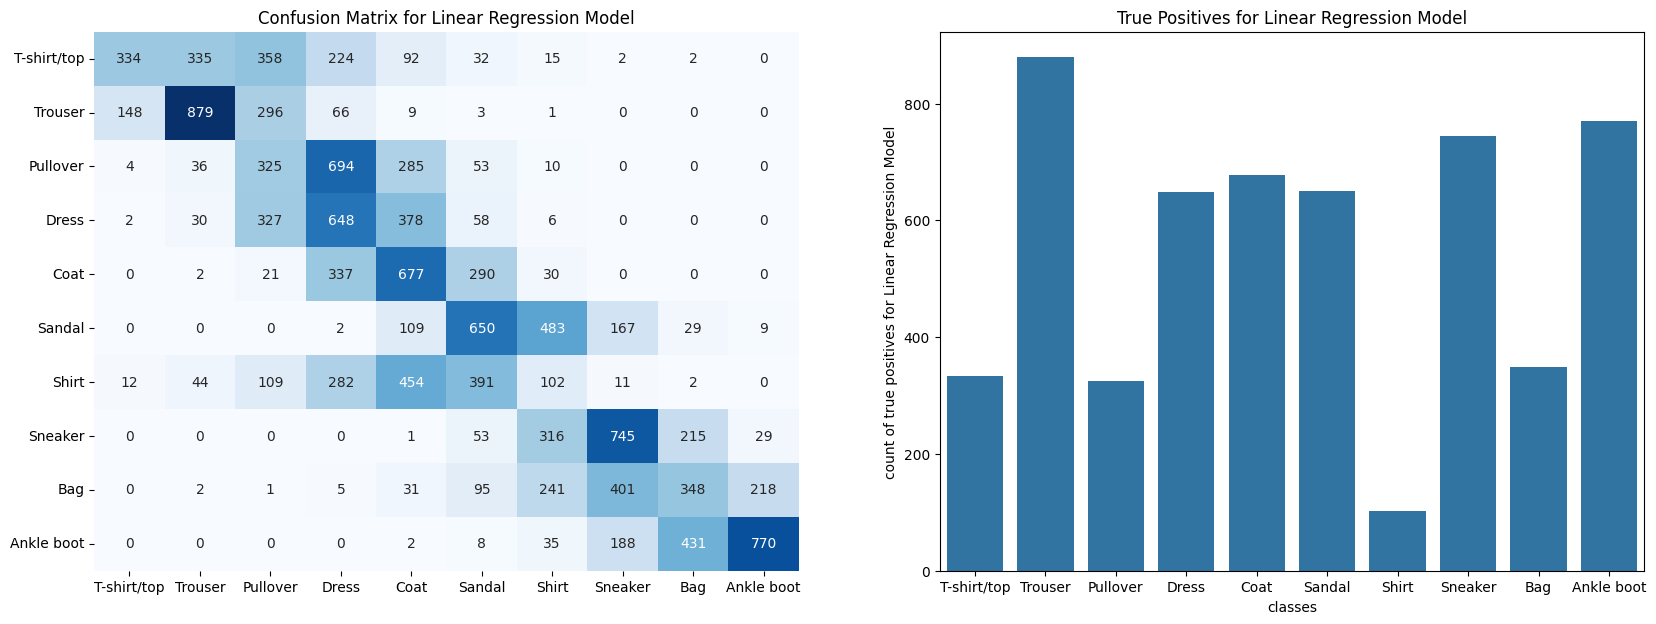

In [27]:
plot_criteria(dfs,classes)

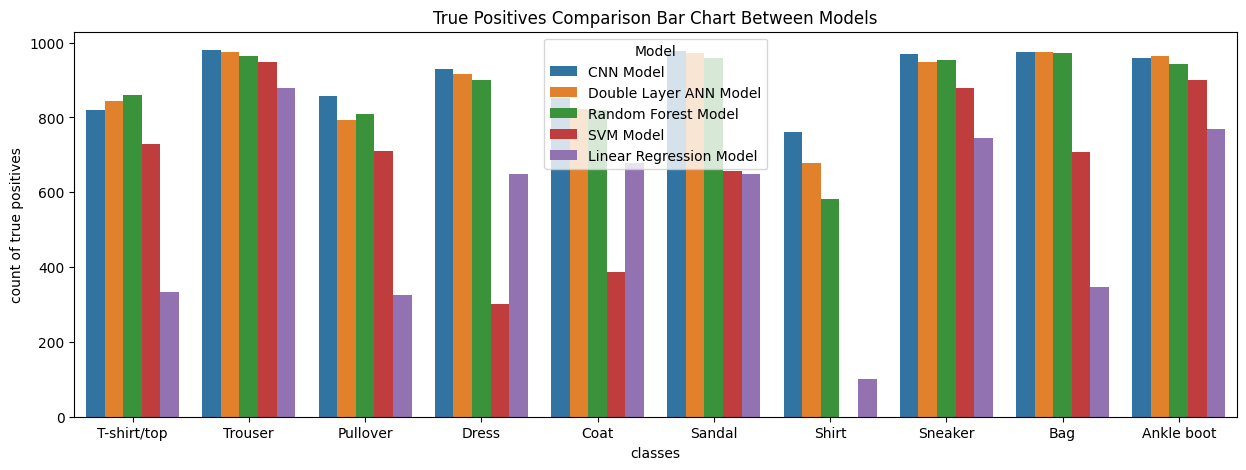

In [36]:
data = []
models=[]
for i, df in dfs.items():
  confusion_mtrx = df.drop(columns=df.columns[0])
  data.append(np.diag(confusion_mtrx))
  models.append(i)
y_data = pd.DataFrame(data).T
y_data.columns = models
y_data['classes'] = [value for value in classes.values()]
data_transformed = y_data.melt(id_vars='classes', var_name='Model')
plt.figure(figsize=(15,5))
sns.barplot(data=data_transformed, x='classes', y='value', hue='Model')
plt.title('True Positives Comparison Bar Chart Between Models')
plt.ylabel('count of true positives')
plt.xlabel('classes')
plt.show()